In [1]:
import pandas as pd

In [790]:
data = pd.read_csv('C:/Users/Игорь/Downloads/Data_Sample.csv')

In [791]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12.01.2010 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12.01.2010 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12.01.2010 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12.01.2010 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12.01.2010 9:02,"2,75",17850.0,United Kingdom


In [792]:
from datetime import datetime
def date_convertor_month(x):
    try:
        date_str = datetime.strptime(x, '%m/%d/%y %H:%M')
    except:
        try:
            date_str = datetime.strptime(x, '%m.%d.%Y %H:%M')
        except:
            date_str = datetime.strptime(x, '%m/%d/%y %H:%M')
            
    return date_str.strftime('%m-%Y')

def date_convertor_day(x):
    try:
        date_str = datetime.strptime(x, '%m/%d/%y %H:%M')
    except:
        try:
            date_str = datetime.strptime(x, '%m.%d.%Y %H:%M')
        except:
            date_str = datetime.strptime(x, '%m/%d/%y %H:%M')
            
    return date_str.strftime('%Y-%m-%d')

In [793]:
data['Month'] = data['InvoiceDate'].apply(date_convertor_month)
data['Date'] = data['InvoiceDate'].apply(date_convertor_day)

In [794]:
tableware = ['dish','plate','spoon','bottle','mug','spoon','cup','can','holder','pot',
             'container','frying','pan','cake','cakes','saucer','tea','teapot','bowl',
             'cakestand','cutlery','jam','tin','tins','bread','dinner','tray','cookie','jar','glass']
light = ['light','candle','t-light','lights','candles','chocolatecandle']
frames_and_pictures = ['frame','photo','miniature','art','paint','paints','heart.','ornament','mirror','heart']
stickers = ['stickers','sign','word','magnets','plasters','tags','tag']
bags_umbrellas = ['bag','bags','basket','baskets','backpack','shopper','umbrella','umbrellas','parasol']
stationery = ['cards','card','scissors','scissor','pencil','pencils',
              'calendar','book','ribbon','ribbons','paper','chalkboard','board','notebook']
accessoires = ['doorbell','clock','box','boxes','bucket','doormat','bell',
               'hang','hanger','hook','rack','cabinet','knob','fan','storage','cushion']
garden = ['flower','flowers','garden','rose','tree']
toys = ['statuette','horse','figurine','treasure','soldier','doll',
                  'dolls','feltcraft','rabbit','bear','warmer','dolly',
        'donkey','game','butterfly','bird','easter']
style = ['retrospot','christmas','union','vintage','babushka','antique']
flags = ['flag','flags','bunting','buntings']
sets = ['set','sets','kit','kits']


In [795]:
def goods_determinator(x):
    try:
        
        b = x.lower().split()
        if any(i in b for i in tableware):
            return 'tableware'
        elif any(i in b for i in light):
            return 'light'
        elif any(i in b for i in frames_and_pictures):
            return 'frames_and_pictures'
        elif any(i in b for i in bags_umbrellas):
            return 'bags & umbrellas'
        elif any(i in b for i in stationery):
            return 'stationery'
        elif any(i in b for i in accessoires):
            return 'accessoires'
        elif any(i in b for i in garden):
            return 'garden'      
        elif any(i in b for i in toys):
            return 'toys'
        elif any(i in b for i in stickers):
            return 'stickers'
        elif any(i in b for i in style):
            return 'style'
        elif any(i in b for i in flags):
            return 'flags'
        elif any(i in b for i in sets):
            return 'set'
        return 'undefined'
    except:
        return 'undefined'

In [796]:
data['Category'] = data['Description'].apply(goods_determinator)

In [797]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 11 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null object
CustomerID     40643 non-null float64
Country        54214 non-null object
Month          54214 non-null object
Date           54214 non-null object
Category       54214 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.5+ MB


In [798]:
import locale
locale.setlocale(locale.LC_ALL, 'fr_FR')
def multiplyer(x):
    
    return round(int(x['Quantity']) * locale.atof(x['UnitPrice']))


In [799]:
data['Cost'] = data.apply(multiplyer,axis=1)

In [800]:
data[data['Category'] == 'null']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date,Category,Cost


In [801]:
month_sales = data.groupby('Month').sum().sort_values('Month', ascending=False)

In [802]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 12 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null object
CustomerID     40643 non-null float64
Country        54214 non-null object
Month          54214 non-null object
Date           54214 non-null object
Category       54214 non-null object
Cost           54214 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 5.0+ MB


In [803]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

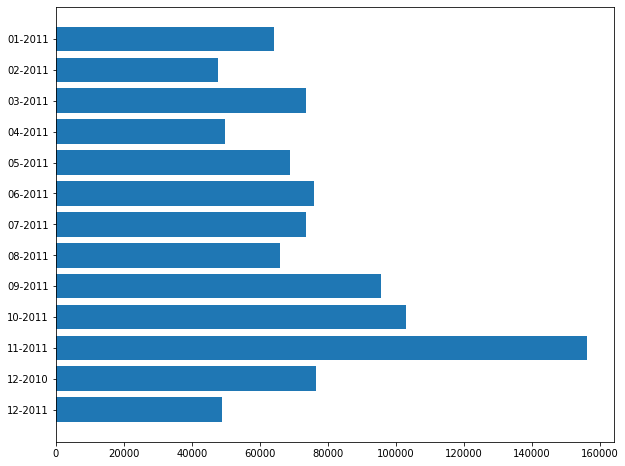

In [804]:
plt.barh(month_sales.index, month_sales['Cost'])

In [805]:
data_goods = data.groupby('Description').sum().sort_values('Cost', ascending=False)

In [806]:
losses = data_goods[data_goods['Cost'] < 0]
small_sales = data_goods[data_goods['Cost'] < 10]
sales = data_goods[data_goods['Cost'] > 0]

In [809]:
data_goods = data.groupby('Date').sum().sort_values('Date', ascending=False)

In [810]:
data_goods.head()

,Quantity,CustomerID,Cost
Date,,,
2011-12-09,1673,1147015.0,3119
2011-12-08,3521,3980362.0,9376
2011-12-07,5294,3163844.0,10674
2011-12-06,2604,4162406.0,4531
2011-12-05,5041,5302575.0,8895


In [811]:
len(data['StockCode'].unique())

3351

In [813]:
data.mode()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date,Category,Cost
0,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,10/31/11 14:41,"1,25",17841.0,United Kingdom,11-2011,2011-12-05,tableware,2


In [775]:
#sales.reset_index(level=0, inplace=True)

In [836]:
undef = data[data['Category'] == 'undefined'][['Description','Category']]

In [837]:
undef.dropna(inplace=True)

In [838]:
undef.head(10)

,Description,Category
14,BLUE OWL SOFT TOY,undefined
30,PACK OF 12 BLUE PAISLEY TISSUES,undefined
66,OWL DOORSTOP,undefined
72,COSY SLIPPER SHOES SMALL RED,undefined
88,SWEETHEART WIRE WALL TIDY,undefined
93,BLUE SWEETHEART BRACELET,undefined
95,MINI FUNKY DESIGN TAPES,undefined
103,ORANGE SCENTED SET/9 T-LIGHTS,undefined
127,LOVEBIRD HANGING DECORATION WHITE,undefined
129,ASS COL SMALL SAND GECKO P'WEIGHT,undefined


In [839]:
undef_list = undef['Description'].to_list()

In [840]:
str_undef = ' '.join(undef_list)

In [841]:
str_undef

'BLUE OWL SOFT TOY PACK OF 12 BLUE PAISLEY TISSUES  OWL DOORSTOP COSY SLIPPER SHOES SMALL  RED  SWEETHEART WIRE WALL TIDY BLUE SWEETHEART BRACELET MINI FUNKY DESIGN TAPES ORANGE SCENTED SET/9 T-LIGHTS LOVEBIRD HANGING DECORATION WHITE  ASS COL SMALL SAND GECKO P\'WEIGHT VICTORIAN  METAL POSTCARD SPRING MINI JIGSAW CIRCUS PARADE  10 COLOUR SPACEBOY PEN SILVER  CANDLEPOT JARDIN  HEARTS GIFT TAPE RED KITCHEN SCALES WHITE METAL LANTERN PINK/PURPLE RETRO RADIO SILVER LARIAT BLACK STONE EARRINGS BLUE SWEETHEART BRACELET ASSTD DESIGN RACING CAR PEN ELEPHANT, BIRTHDAY CARD,  FEATHER PEN,LIGHT PINK FEATHER PEN,HOT PINK CINAMMON & ORANGE WREATH COSY HOUR GIANT TUBE MATCHES SMALL HANGING GLASS+ZINC LANTERN NOEL WOODEN BLOCK LETTERS  MINI JIGSAW CIRCUS PARADE  SLEEPING CAT ERASERS PACK OF 12 PINK POLKADOT TISSUES LETTER "J" BLING KEY RING PACK OF 12 HEARTS DESIGN TISSUES  ASSORTED TUTTI FRUTTI SMALL PURSE MOCK LOBSTER FRIDGE MAGNET PACK OF 12 PINK PAISLEY TISSUES  MAGIC DRAWING SLATE CIRCUS PARADE

In [842]:
from collections import Counter

In [844]:
c = Counter()
for word in str_undef.split():
    c[word] += 1

print(c)

Counter({'OF': 626, 'PACK': 550, 'DESIGN': 466, '12': 386, 'DECORATION': 362, 'PINK': 361, 'ASSORTED': 318, 'WRAP': 297, 'TISSUES': 296, 'PANTRY': 291, 'RED': 286, 'TRADITIONAL': 281, 'HANGING': 250, 'KITCHEN': 246, 'WHITE': 243, 'SPACEBOY': 238, 'BLUE': 225, 'WOODEN': 223, 'CREAM': 220, 'POLKADOT': 208, 'MINI': 202, 'METAL': 195, 'POSTAGE': 194, 'PEN': 193, '3': 193, 'STAR': 185, 'SCALES': 184, 'KEY': 181, 'BIRTHDAY': 172, 'HOME': 168, 'PAINTED': 160, 'TOY': 154, 'GARLAND': 151, "POPPY'S": 150, 'PLAYHOUSE': 150, 'HERB': 148, 'MARKER': 148, 'APRON': 148, 'RING': 147, 'HEARTS': 145, 'APPLES': 140, 'SMALL': 137, 'MAT': 134, 'PAD': 133, 'SLATE': 130, 'PARTY': 129, 'ZINC': 129, 'LARGE': 128, '20': 128, 'NAPKINS': 125, 'ALPHABET': 122, 'MAGIC': 120, 'LANTERN': 119, 'ENAMEL': 115, 'BRACELET': 114, 'DRAWING': 114, 'BELLS': 114, 'WICKER': 113, 'RECYCLED': 113, 'ACAPULCO': 113, 'TIDY': 110, 'BRUSH': 110, 'KNEELING': 110, 'WITH': 107, 'CHILDRENS': 106, 'GREEN': 105, 'SILVER': 104, 'FOB': 103, 'I

In [817]:
data.to_csv('C:/Users/Игорь/Downloads/AIC-4.csv',date_format = '%Y-%m-%d')

In [786]:
data.groupby('Category').sum().sort_values('Cost',ascending = False)

,Quantity,CustomerID,Cost
Category,,,
tableware,134074,154310005.0,276252.570
bags & umbrellas,66438,68240471.0,139180.440
accessoires,46480,68498332.0,123029.720
undefined,66815,87533232.0,101745.441
frames_and_pictures,47873,49055121.0,87767.960
stationery,54498,56276729.0,69106.730
style,28432,29071592.0,45332.060
stickers,20327,27755109.0,38705.020
light,13819,15528955.0,29476.210


In [819]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date,Category,Cost
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12.01.2010 8:26,"3,39",17850.0,United Kingdom,12-2010,2010-12-01,frames_and_pictures,20
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12.01.2010 8:34,"1,69",13047.0,United Kingdom,12-2010,2010-12-01,frames_and_pictures,54
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12.01.2010 8:34,"5,95",13047.0,United Kingdom,12-2010,2010-12-01,stickers,18
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12.01.2010 8:34,"4,95",13047.0,United Kingdom,12-2010,2010-12-01,accessoires,15
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12.01.2010 9:02,"2,75",17850.0,United Kingdom,12-2010,2010-12-01,accessoires,22


In [893]:
def null_customer(x):
    a = str(x['CustomerID'])
    if not a.isdigit():
        return x['InvoiceNo']
    return x['CustomerID']

In [883]:
data[data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Date,Category,Cost,CustomerID_Full
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12.01.2010 14:32,"2,51",NaN,United Kingdom,12-2010,2010-12-01,accessoires,3,NaN
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,12.01.2010 14:32,"3,36",NaN,United Kingdom,12-2010,2010-12-01,tableware,3,NaN
160,536544,21879,HEARTS GIFT TAPE,1,12.01.2010 14:32,"1,66",NaN,United Kingdom,12-2010,2010-12-01,undefined,2,NaN
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,12.01.2010 14:32,"4,21",NaN,United Kingdom,12-2010,2010-12-01,bags & umbrellas,4,NaN
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,12.01.2010 14:32,"3,36",NaN,United Kingdom,12-2010,2010-12-01,toys,3,NaN
163,536544,22115,METAL SIGN EMPIRE TEA,2,12.01.2010 14:32,"5,91",NaN,United Kingdom,12-2010,2010-12-01,tableware,12,NaN
164,536544,22144,CHRISTMAS CRAFT LITTLE FRIENDS,4,12.01.2010 14:32,"4,21",NaN,United Kingdom,12-2010,2010-12-01,style,17,NaN
165,536544,22149,FELTCRAFT 6 FLOWER FRIENDS,1,12.01.2010 14:32,"4,21",NaN,United Kingdom,12-2010,2010-12-01,garden,4,NaN
166,536544,22195,LARGE HEART MEASURING SPOONS,1,12.01.2010 14:32,"3,36",NaN,United Kingdom,12-2010,2010-12-01,frames_and_pictures,3,NaN
167,536544,22265,EASTER DECORATION NATURAL CHICK,2,12.01.2010 14:32,"1,28",NaN,United Kingdom,12-2010,2010-12-01,toys,3,NaN


In [895]:
data['CustomerID_Full'] = data.apply(null_customer,axis=1)

In [899]:
data.drop(columns = ['CustomerID'],inplace = True)

In [901]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 12 columns):
InvoiceNo          54214 non-null object
StockCode          54214 non-null object
Description        54080 non-null object
Quantity           54214 non-null int64
InvoiceDate        54214 non-null object
UnitPrice          54214 non-null object
Country            54214 non-null object
Month              54214 non-null object
Date               54214 non-null object
Category           54214 non-null object
Cost               54214 non-null int64
CustomerID_Full    54214 non-null object
dtypes: int64(2), object(10)
memory usage: 5.0+ MB


In [905]:
data.to_csv('C:/Users/Игорь/Downloads/AIC-4.csv',date_format = '%Y-%m-%d')

In [906]:
losses

,Quantity,CustomerID,Cost
Description,,,
PORCELAIN HANGING BELL SMALL,-1,12472.0,-1
PARTY PIZZA DISH BLUE POLKADOT,20,75674.0,-1
LARGE STRIPES CHOCOLATE GIFT BAG,-1,16150.0,-2
BLUE FLYING SINGING CANARY,-1,14800.0,-4
HANGING SPRING FLOWER EGG LARGE,-4,31266.0,-4
12 PINK ROSE PEG PLACE SETTINGS,-4,13715.0,-5
WHITE ALLIUM ARTIFICIAL FLOWER,-3,0.0,-5
VINTAGE NOTEBOOK PARIS DAYS,-1,16581.0,-6
CLEAR MILKSHAKE GLASS,-4,15311.0,-7


In [907]:
data.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'Country',
 'Month',
 'Date',
 'Category',
 'Cost',
 'CustomerID_Full']